In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import time

In [2]:
#D = np.asarray(Image.open('march/test_d.png'))

In [3]:
def Build(N):
    h = len(N);
    w = len(N[0]);
    if (len(N)):
        h = len(N);
        w = len(N[0]);
    _d = np.zeros((h, w));
    _n = np.zeros((h, w));
    return h, w, _d, _n;

In [12]:
############################################################################################
##################################### COLOR PREFERENCES ####################################
############################################################################################

def GetColor(pix):
    #print('for {}{}{} => r = {}; g = {}; b = {}'.format(red, green, blue, pix[0], pix[1], pix[2]));
    if ((pix[0] > 150) and (pix[1] < 120 and pix[2] < 120)):
        return True;
    return False;

def GetPlotData(I, imgh, imgw):
    t0 = time.time()
    r_x = [];
    r_y = [];
    for col in range(0,imgw):
        for row in range(0, imgh):
            if (GetColor(I[row][col])):
                r_x.append(col);
                r_y.append(row);
    t1 = time.time()
    print(t1-t0)
    return r_x,r_y;

In [5]:
############################################################################################
######################################### REVERSING ########################################
############################################################################################
def Reversing(inp):
    for i in range(0, len(inp)):
        inp[i] = image_h - inp[i];
    print('reversed');
    return inp;

In [6]:
############################################################################################
####################################### NORMALIZATION ######################################
############################################################################################
def Normalization(inp, min_val, max_val, normalization_value):
    rng = max_val - min_val;
    for i in range(0, len(inp)):
        inp[i] = inp[i]/(normalization_value)*rng;
    return inp;

In [7]:
############################################################################################
####################################### RASTORIZATION ######################################
############################################################################################
def Rastorization(inp, out):
    out.append(inp[0]);
    for i in range(1, len(inp)):
        if ((inp[i] - inp[i-1]) > 4):
            out.append(inp[i-1]);
    return inp;

In [149]:
image = Image.open('march/smpl4.jpg')
N = np.asarray(image)
n_x = [];
n_y = [];
image_h, image_w, n_x, n_y = Build(N);
n_x, n_y = GetPlotData(N, image_h, image_w);
n_y = Reversing(n_y);
n_y = Normalization(n_y, 94, 193, image_h);
n_x = Normalization(n_x, 0, 11, image_w);

1.4680838584899902
reversed


In [150]:
nx = [];
ny = [];
k = 1;
for i in range(len(n_x)):
    if (not(k % 15)):
        nx.append(n_x[i]);
        ny.append(n_y[i]);
    k+=1;

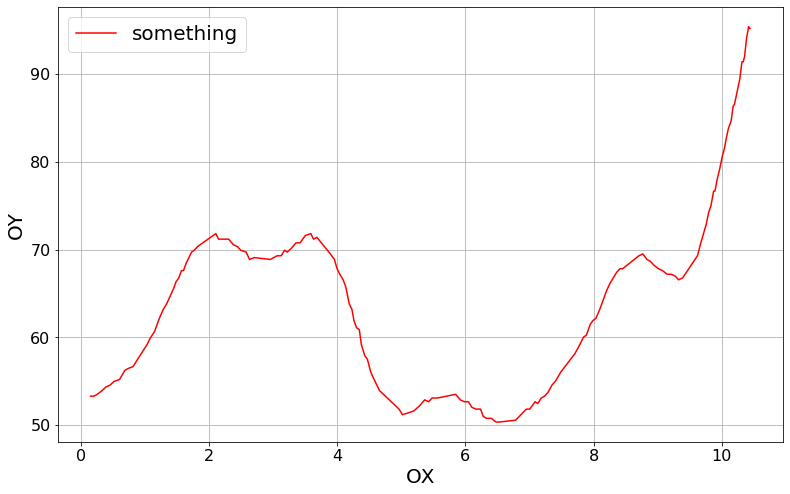

In [151]:
plt.figure(figsize=(13,8))
plt.plot(nx, ny, 'r-', label = 'something')
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.xlabel('OX', fontsize=20);
plt.ylabel('OY', fontsize=20);
plt.legend(fontsize=20);
plt.grid(True);
plt.show();

In [124]:
len(n_x)

2974

In [125]:
len(nx)

2677